In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import math
plt.style.use('niceplot2')
import glob

/Users/hliastro/anaconda2/lib/python2.7/site-packages/matplotlib/style/core.py:53: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


In [2]:
def BT_profile(R, Ie0, Re, Id0, Rd):
    Ie = Ie0*np.exp(-7.67*((R/Re)**0.25-1))
    Id = Id0*np.exp(-R/Rd)
    return Ie+Id

def Sersic_profile(R, Ie, Re, n, bn):
    return Ie * np.exp(-bn*((R/Re)**(1/n)-1))

def log_BT_profile(R, Ie0, Re, Id0, Rd):
    Ie = Ie0*np.exp(-7.67*((R/Re)**0.25-1))
    Id = Id0*np.exp(-R/Rd)
    return np.log10(Ie+Id)

def ln_Sersic_profile(R, Ie, Re, n, bn):
    return np.log(Ie) - bn*( (R/Re)**(1/n)-1 )

def T_profile(R, Id0, Rd):
    Id = Id0*np.exp(-R/Rd)
    return Id

def B_profile(R, Ie0, Re):
    Ie = Ie0*np.exp(-7.67*((R/Re)**0.25-1))
    return Ie

In [13]:
prof_files = glob.glob('profiles_faceon_adaptive/profile_*.txt')

In [14]:
plt.figure(figsize=(6,6))
decomp_stored = []
for f in prof_files:
    prof = np.loadtxt(f)
    #plt.plot(prof[:,0], prof[:,2], c='k', alpha=0.1)
    
    subhaloID = int(f.split('/')[-1][8:-4])
    index  = (prof[:,0]<50) & (prof[:,0]>0.1)
    try:
        popt, pcov = curve_fit(log_BT_profile, prof[index,0], np.log10(prof[index,2]),
                               p0=[1e8, 1, 1e6,10], bounds=((1,0,1,0),(1e13,50,1e13,100)))
        decomp_stored.append( [subhaloID, popt[0], popt[1], popt[2], popt[3]])
    except Warning:
        print "warning", subhaloID
        #plt.plot(prof[:,0], prof[:,2], c='k', alpha=0.5)
    except RuntimeError:
        print "error", subhaloID
        decomp_stored.append( [subhaloID, -1, -1, -1, -1])
        #plt.plot(prof[:,0], prof[:,2], c='k', alpha=0.5)

# plt.xlim(0,30)
# plt.ylim(1e5,1e11)
# #plt.xscale('log')
# plt.yscale('log')
# plt.xlabel(r'$R \; ({\rm kpc})$')
# plt.ylabel(r'$I \; (L_\odot/{\rm kpc}^2)$')
#plt.savefig('profiles.pdf',bbox_inches='tight',pad_inches=0.03,dpi=300)

error 434152
error 454462
error 467212
error 502560
error 585369


In [15]:
decomp_stored = np.array(decomp_stored)
np.savetxt( 'BD_decomp_MW.txt', decomp_stored, header='subhaloID, Ie0, Re, Id0, Rd' )

In [27]:
decomp_stored = []
for f in prof_files:
    prof = np.loadtxt(f)
    subhaloID = int(f.split('/')[-1][8:-4])
    
    index  = (prof[:,0]<100) & (prof[:,0]>0.1)
    try:
        popt, pcov = curve_fit(log_BT_profile, prof[index,0], np.log10(prof[index,2]),
                               p0=[1e8, 1, 1e6,10], bounds=((1,0,1,0),(1e11,50,1e11,100)), )
        print popt[1]*popt[1]*popt[0]/ (popt[3]*popt[3]*popt[2])
        
        plt.plot(prof[:,0], prof[:,2], c='k')

        R_ana = np.linspace(0.1,100,100)
        #prof = np.array([BT_profile(r, Ie0, Re, Id0, Rd) for r in R])
        prof_ana = 10**log_BT_profile(R_ana, popt[0], popt[1], popt[2], popt[3])
        prof_B = B_profile(R_ana, popt[0], popt[1])
        prof_T = T_profile(R_ana, popt[2], popt[3])

        plt.plot(R_ana, prof_ana, c='k', ls='--')
        plt.plot(R_ana, prof_B, c='r')
        plt.plot(R_ana, prof_T, c='b')

        plt.xlim(0.1,100)
        plt.ylim(1e4,1e10)
        #plt.xscale('log')
        plt.yscale('log')
        plt.xlabel(r'$R \; (\rm{kpc})$')
        plt.ylabel(r'$I(R) \; (L_\odot/\rm{kpc}^2)$')
        plt.savefig('./profile_fit/BD_decomp_'+str(subhaloID)+'.pdf', bbox_inches='tight',pad_inches=0.03,dpi=300)
    
    except RuntimeError:
        print "error", subhaloID
        plt.plot(prof[:,0], prof[:,2], c='k')
        plt.xlim(0.1,100)
        plt.ylim(1e4,1e10)
        #plt.xscale('log')
        plt.yscale('log')
        plt.xlabel(r'$R \; (\rm{kpc})$')
        plt.ylabel(r'$I(R) \; (L_\odot/\rm{kpc}^2)$')
        plt.savefig('./profile_fit/Fail_BD_decomp_'+str(subhaloID)+'.pdf', bbox_inches='tight',pad_inches=0.03,dpi=300)
        
    plt.clf()

0.334553985938
0.911811808631
0.558624801688
0.227115097885
0.531166419622
0.397606573087
4.49889354915
0.603360359875
0.557307720136
0.283321326714
0.457002775007
0.986732909675
1.77377210731
0.546880074123
2.63951297625
0.351936075959
0.92927923309
0.779215683096
0.818993962603
0.57718005477
1.18942871614
1.11714386802
2.55703373801
0.468273840798
0.108427855583
10.7302662196
1.21754985262
0.267111938944
0.769148889355
1.26578856291
0.736240724249
0.385226435452
0.213639805377
0.981361015339
0.357742214849
1.50346482333
2.27973190941
0.260560478996
0.307973876699
1.06721950011
5.01283392702
0.475904072263
0.656678864741
1.01777342759
0.425433687108
0.140113401032
2.64565573477
0.190315326653
0.308056916038
0.398640157517
0.192917383904
1.65336518532
0.981050185147
2.22557121045
0.303234750153
2.18359516761
0.772820261972
2.20306732377
0.621894105496
3.95875730617
2.25926396252
9.72142827575
0.959241964424
2.81093711553
0.338476648957
0.683447259971
1.69697494177
4.05999695065
0.79065

0.224665180957
0.163726204736
0.161039795333
0.508786660417
0.117947749567
0.100328907229
0.147110135913
0.0726943681532
0.016401763193
0.171851122502
0.190059657441
0.630452001582
0.823086837555
0.0732141568927
1.97591712712
0.177694143622
0.0770015658971
12.4583981007
0.172391806949
1.94955857242
1.00563612149
1.1257430769
0.24512409424
0.091824620545
0.0654131505158
0.154484827122
0.402447820562
0.198927012963
2.11983082745
0.615863540891
0.186714917291
0.0225355167904
0.029236509206
1.27263039856
0.0136953467766
0.369099051918
2.67030215348
0.154698614914
0.514813845189
0.420778495019
0.219770042401
0.0901877102828
0.144318172114
0.809499121607
0.0142151024478
0.091203249791
0.387673778873
0.118054656871
0.118611607593
0.276447920691
0.0640497246507
0.426449438393
5.53944376209
0.143856581784
0.638498426085
4.83072573885
0.0951028347733
0.210226914681
4.56719891336
2.18450664927
0.0363113375991
0.299371779815
0.0659236914792
0.326163127762
1.55976184067
error 455551
0.0736536386331

0.386616651946


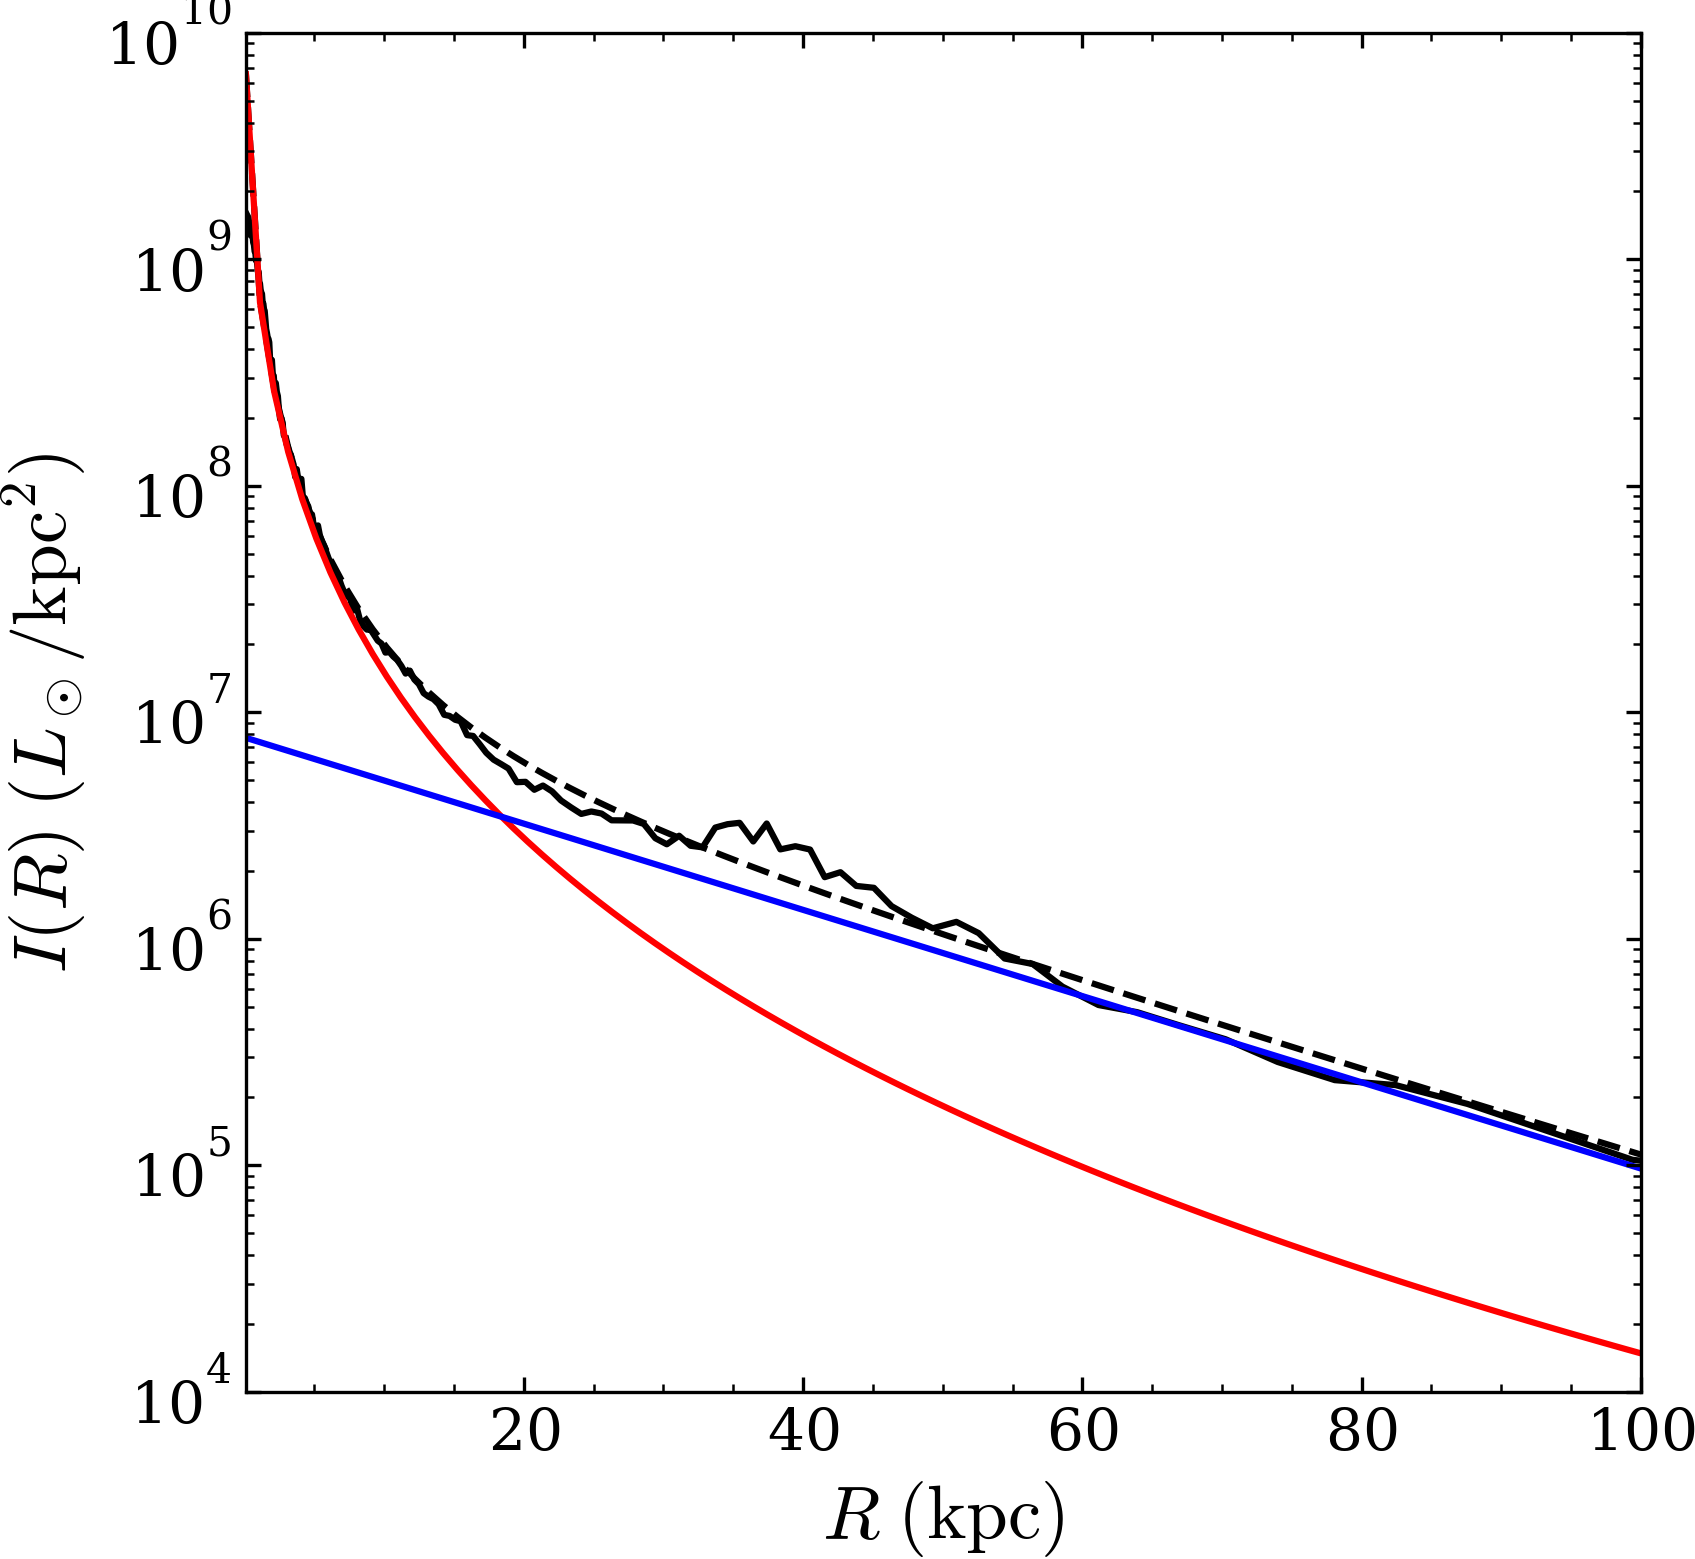

In [18]:
prof = np.loadtxt('profiles_faceon_adaptive/profile_374593.txt')
index  = (prof[:,0]<100) & (prof[:,0]>0.1)
popt, pcov = curve_fit(log_BT_profile, prof[index,0], np.log10(prof[index,2]),
                       p0=[1e8, 1, 1e6,10], bounds=((1,0,1,0),(1e11,50,1e11,100)), )

print popt[1]*popt[1]*popt[0]/ (popt[3]*popt[3]*popt[2])

plt.figure(figsize=(6,6))

plt.plot(prof[:,0], prof[:,2], c='k')

R_ana = np.linspace(0.1,100,100)
#prof = np.array([BT_profile(r, Ie0, Re, Id0, Rd) for r in R])
prof_ana = 10**log_BT_profile(R_ana, popt[0], popt[1], popt[2], popt[3])
prof_B = B_profile(R_ana, popt[0], popt[1])
prof_T = T_profile(R_ana, popt[2], popt[3])

plt.plot(R_ana, prof_ana, c='k', ls='--')
plt.plot(R_ana, prof_B, c='r')
plt.plot(R_ana, prof_T, c='b')

plt.xlim(0.1,100)
plt.ylim(1e4,1e10)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$R \; (\rm{kpc})$')
plt.ylabel(r'$I(R) \; (L_\odot/\rm{kpc}^2)$')
plt.savefig('BD_decomp_eg.pdf', bbox_inches='tight',pad_inches=0.03,dpi=300)

In [19]:
B_lum = decomp_stored[:,2]*decomp_stored[:,2]*decomp_stored[:,1]
D_lum = decomp_stored[:,4]*decomp_stored[:,4]*decomp_stored[:,3]
BT = B_lum/(B_lum+D_lum)
DT = D_lum/(B_lum+D_lum)

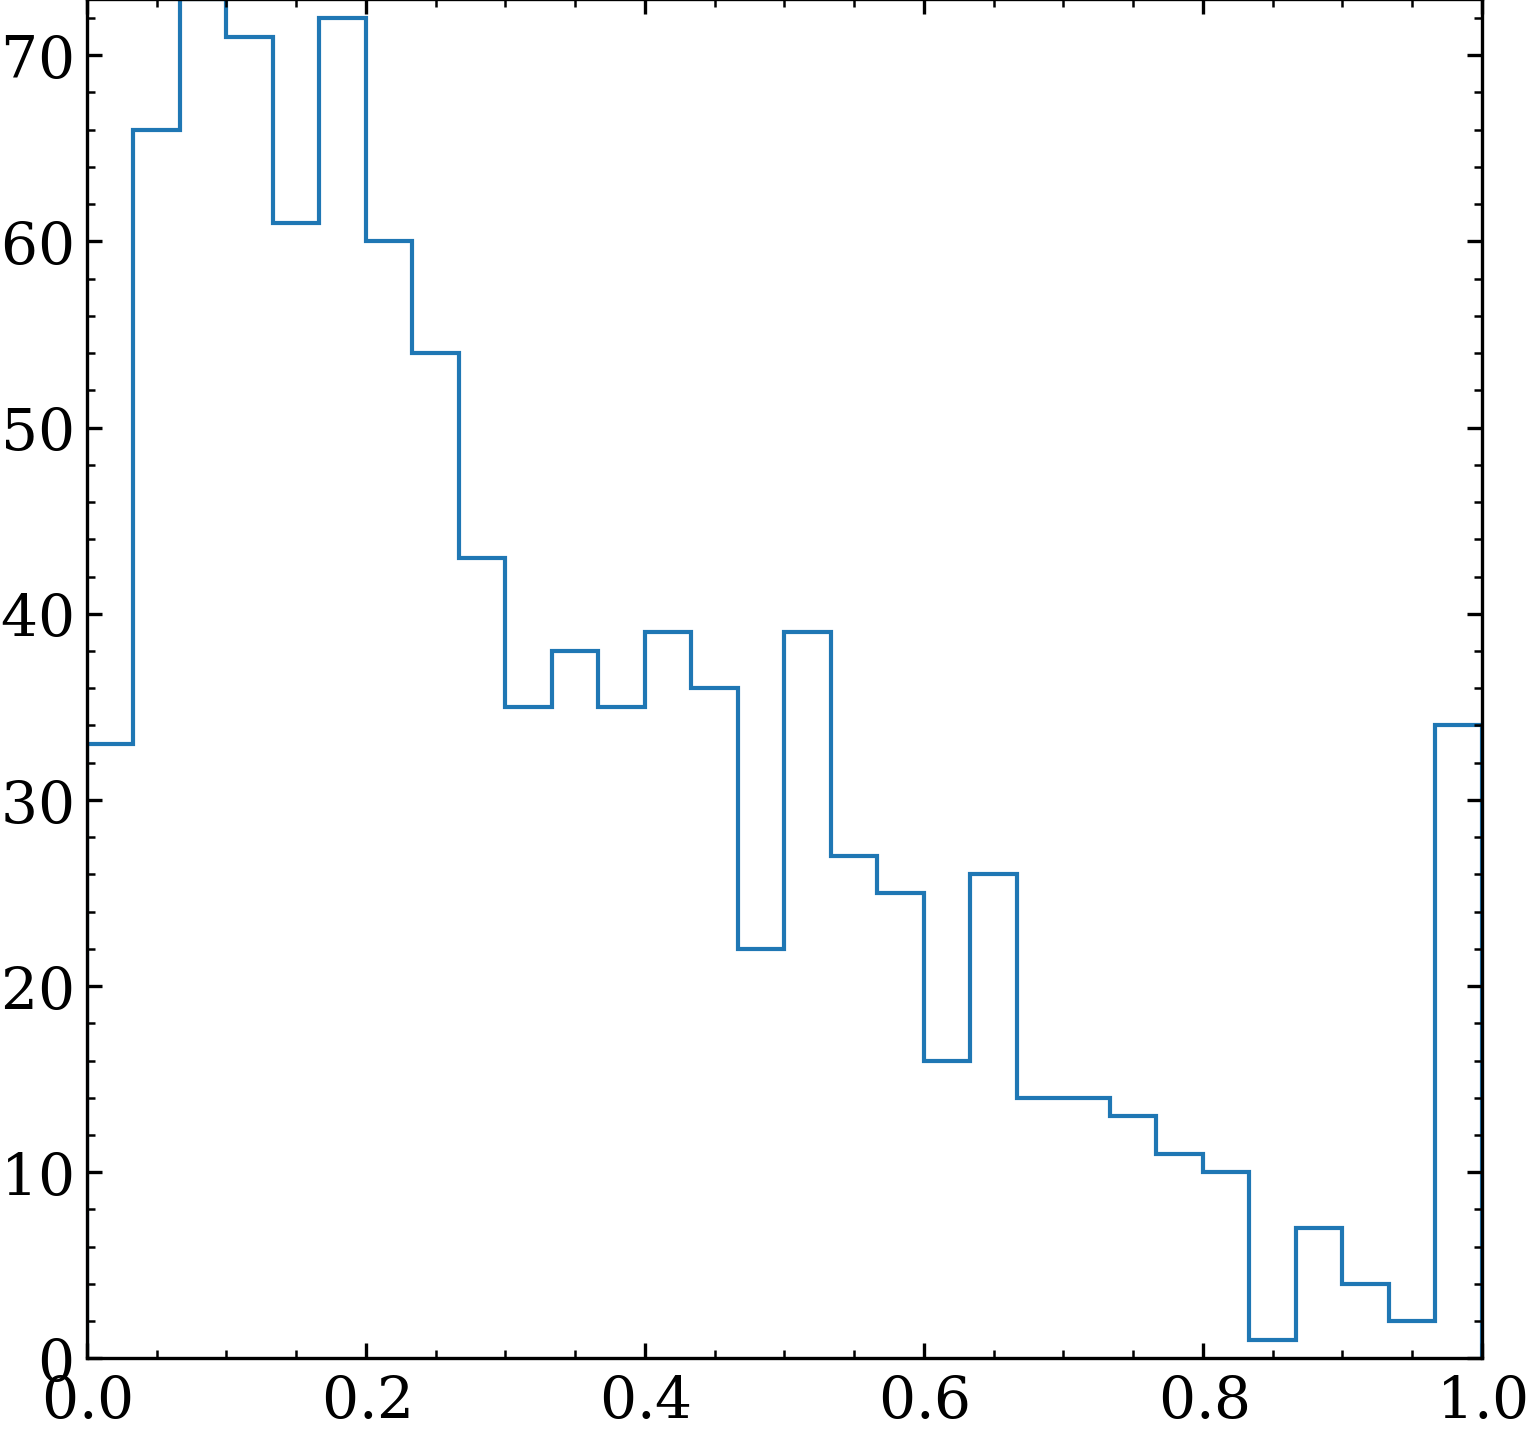

In [20]:
plt.hist(BT, bins=30, histtype='step')
plt.show()

In [21]:
def PLT_variance_2d(x, y, percentile=None, x_bins=None):
    """
    Split 2D scatter samples into different groups by x_bins.
    Return summary statistics of x and y in each bins.
    The summary statistics are listed below in order:
    mean, std, low/median/high quantiles
    """
    assert (len(x)==len(y)), "the length of x and y should be the same!"

    if percentile is None:
        percentile = 5

    x_min = np.min(x)
    x_max = np.max(x)
    if x_bins is None:
        N_bins = np.sqrt(len(x))
        x_bins = np.linspace(x_min, x_max, N_bins)
    elif isinstance(x_bins, int):
        N_bins = x_bins
        x_bins = np.linspace(x_min, x_max, N_bins)

    data = []

    for i in range(len(x_bins)-1):
        index = (x>x_bins[i]) & (x<x_bins[i+1])
        if np.sum(index)<2:
            continue
        x_temp = x[index]
        y_temp = y[index]

        temp = [np.mean(x_temp), np.std(x_temp),
                np.percentile(x_temp, percentile), np.median(x_temp), np.percentile(x_temp, 100-percentile),
                np.mean(y_temp), np.std(y_temp),
                np.percentile(y_temp, percentile), np.median(y_temp), np.percentile(y_temp, 100-percentile)
               ]
        data.append(temp)

    return np.array(data)

In [22]:
stellar_info = np.loadtxt('stellar_info_MW.txt')

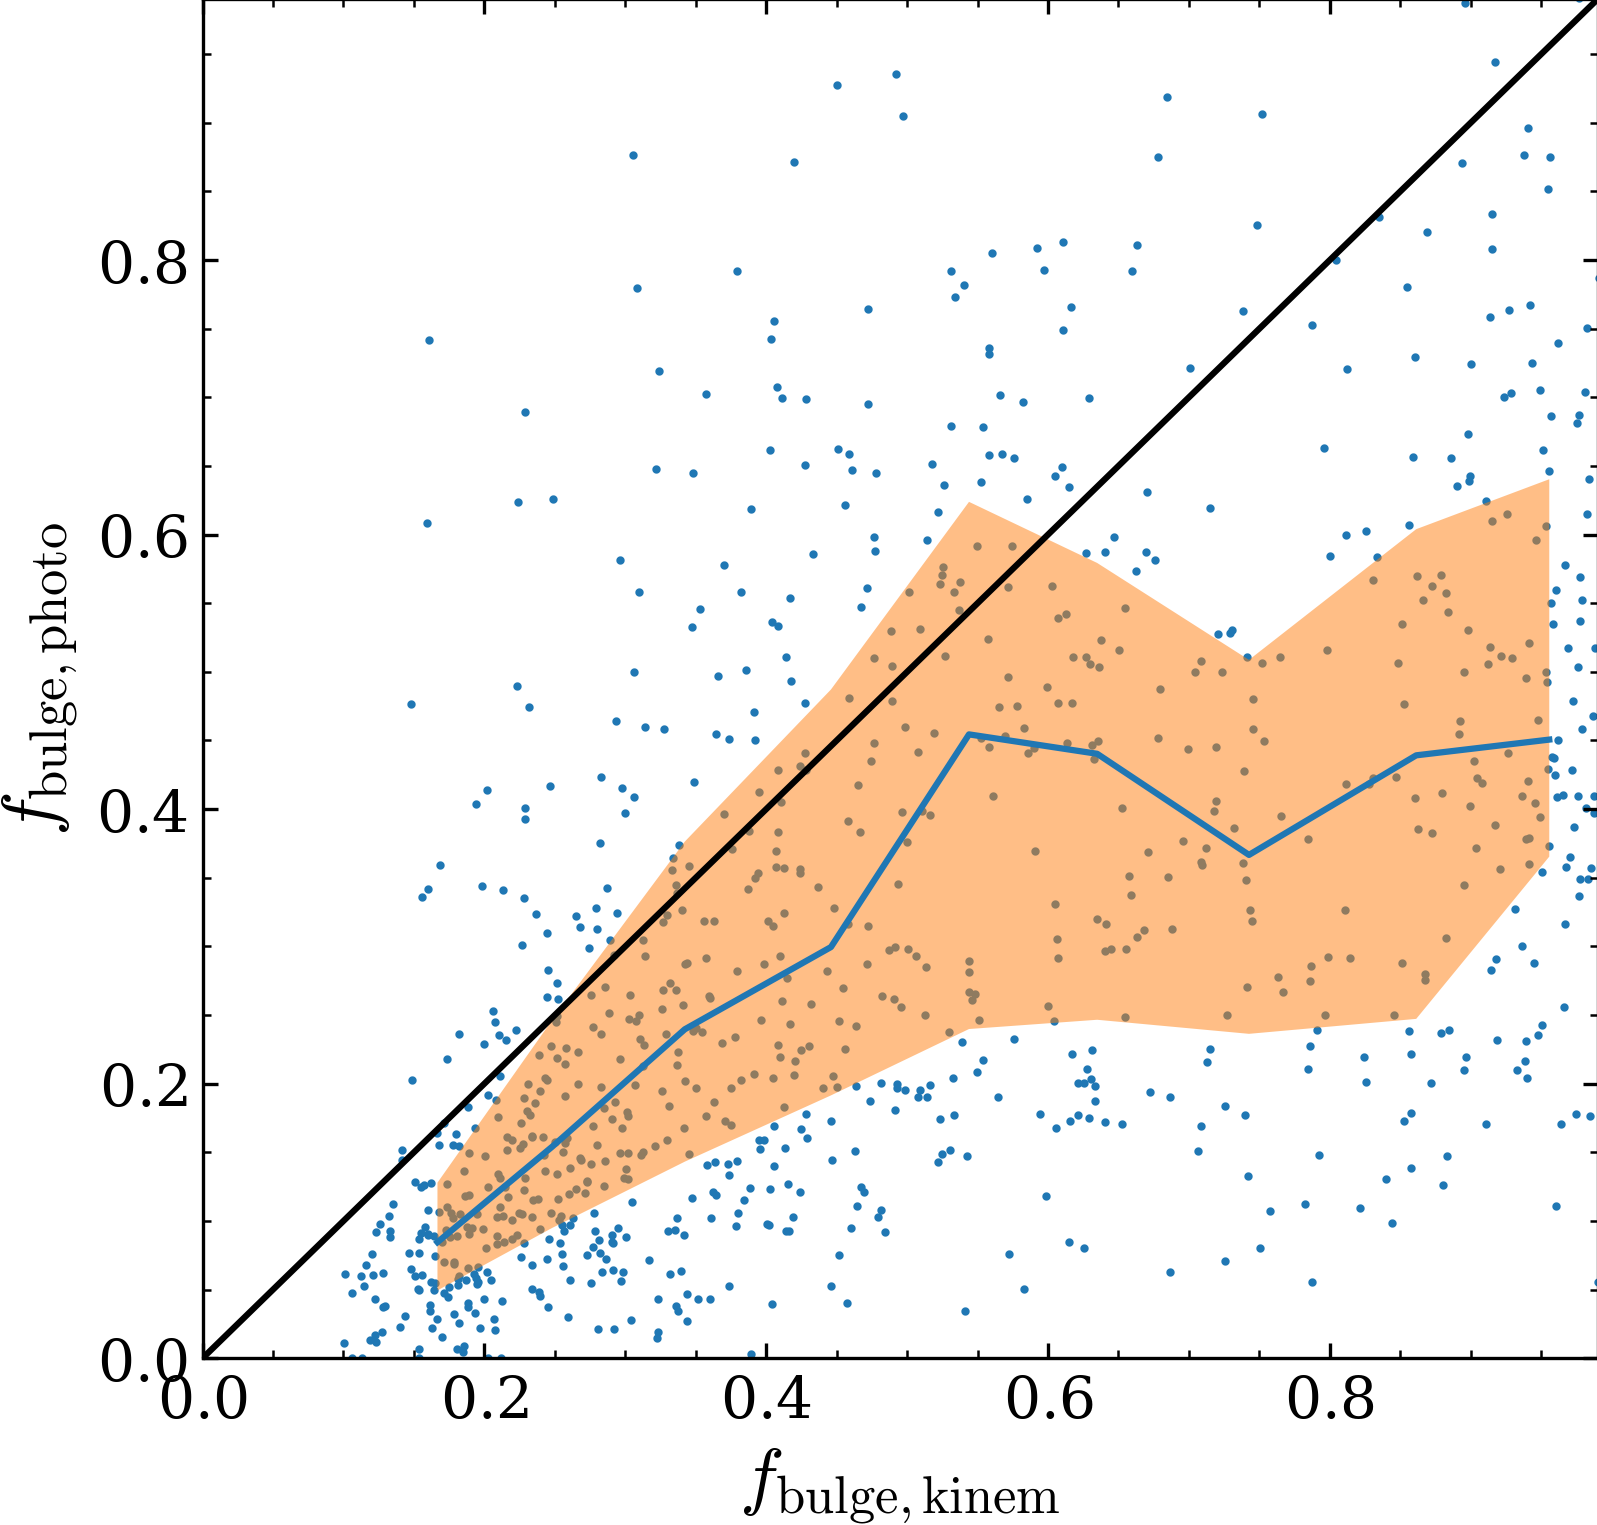

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(stellar_info[:,6], BT, s=1, edgecolors=None)

ranges = PLT_variance_2d(stellar_info[:,6], BT, percentile=25, x_bins=np.linspace(0.1,1,10))
plt.plot(ranges[:,3], ranges[:,8])
plt.fill_between(ranges[:,3], ranges[:,7], ranges[:,9], alpha=0.5)

plt.plot([0,1],[0,1],c='k')
plt.xlim(0,0.99)
plt.ylim(0,0.99)
plt.xlabel(r'$f_{\rm bulge, kinem}$')
plt.ylabel(r'$f_{\rm bulge, photo}$')
plt.savefig('BT_comp.pdf', bbox_inches='tight',pad_inches=0.03,dpi=300)
plt.show()

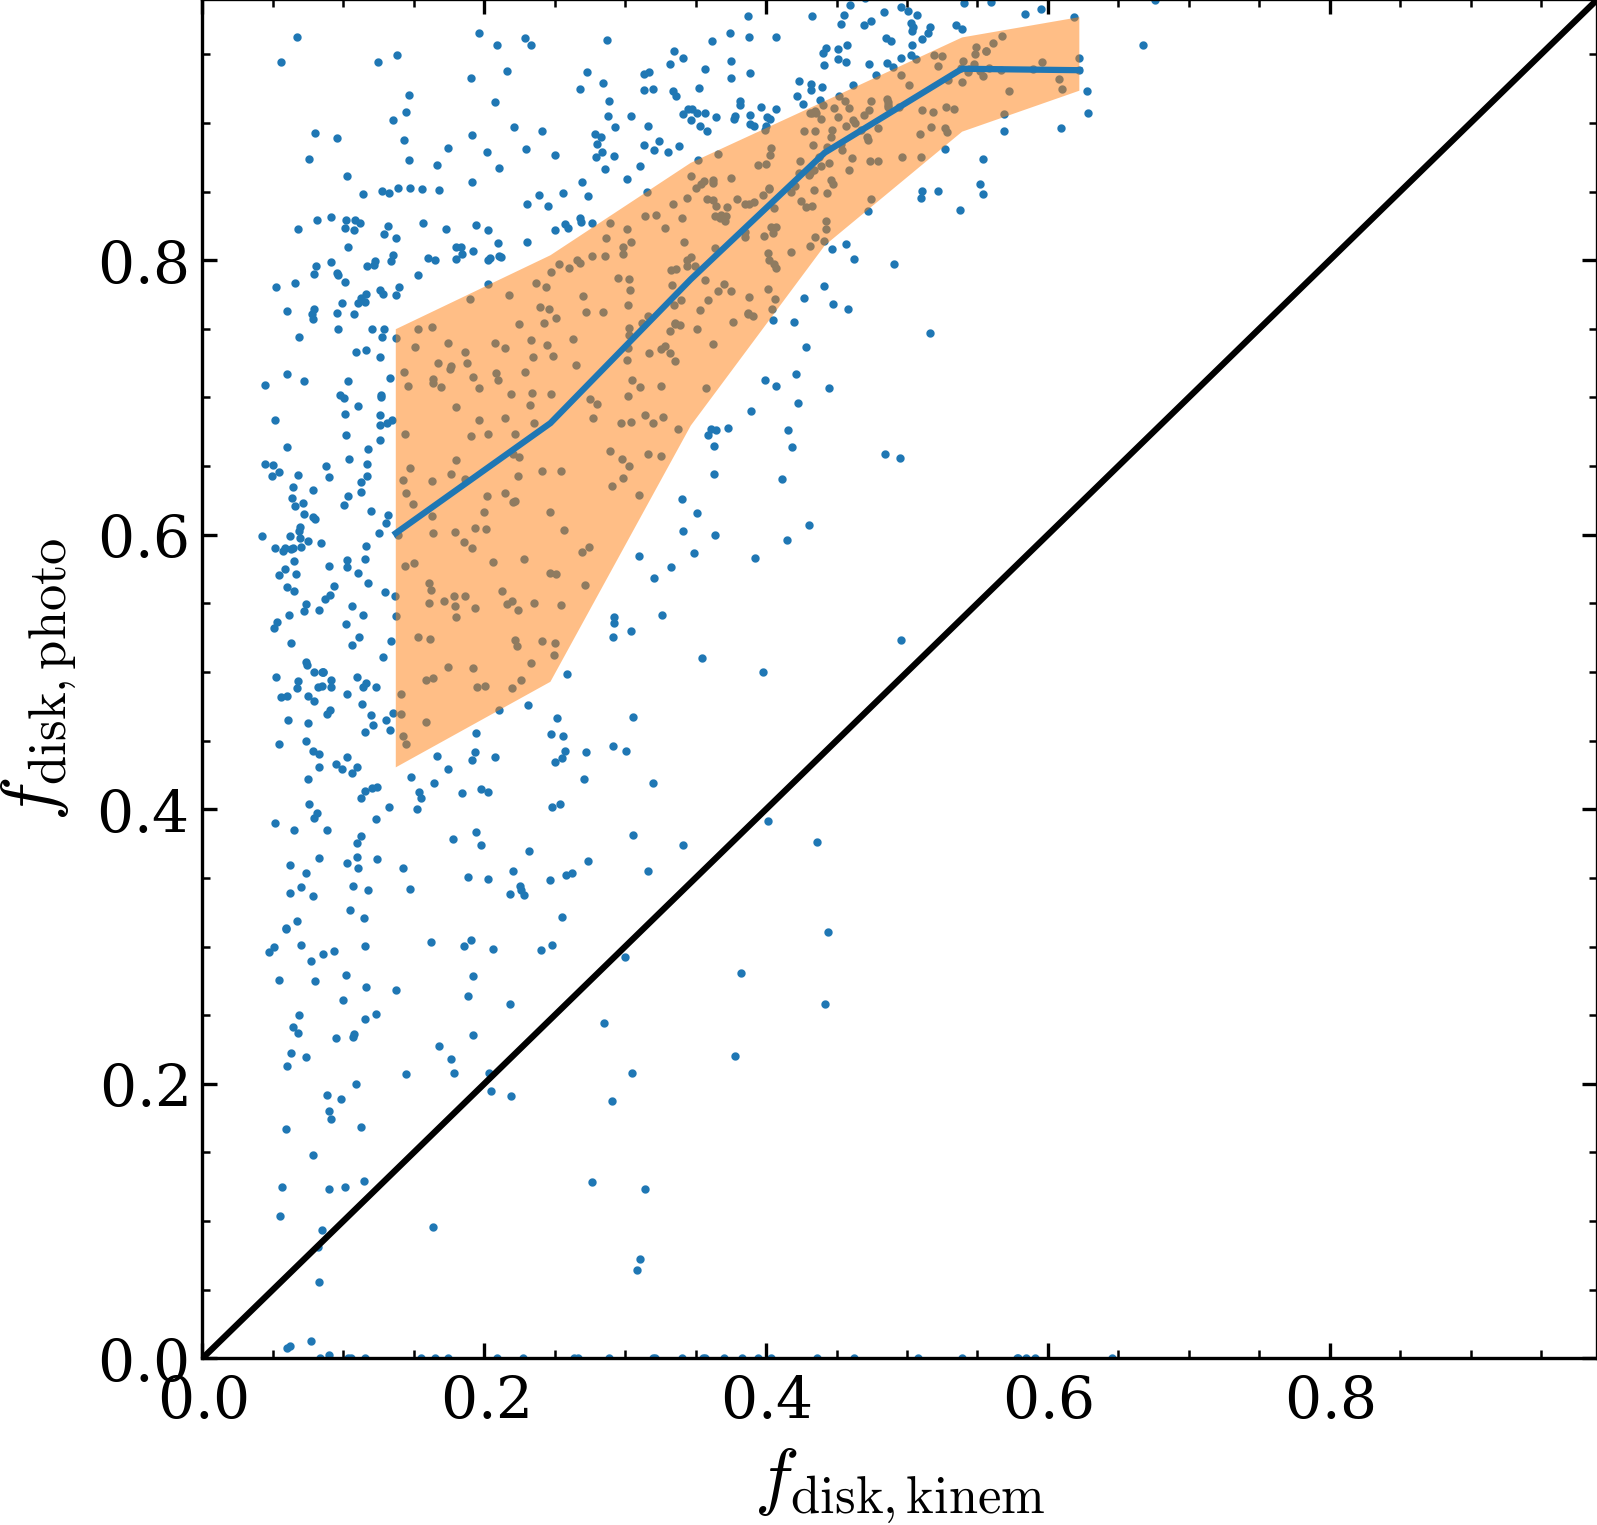

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(stellar_info[:,5], DT, s=1, edgecolors=None)

ranges = PLT_variance_2d(stellar_info[:,5], DT, percentile=25, x_bins=np.linspace(0.1,1,10))
plt.plot(ranges[:,3], ranges[:,8])
plt.fill_between(ranges[:,3], ranges[:,7], ranges[:,9], alpha=0.5)

plt.plot([0,1],[0,1],c='k')
plt.xlim(0,0.99)
plt.ylim(0,0.99)
plt.xlabel(r'$f_{\rm disk, kinem}$')
plt.ylabel(r'$f_{\rm disk, photo}$')
plt.savefig('DT_comp.pdf', bbox_inches='tight',pad_inches=0.03,dpi=300)
plt.show()